In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import json
import os
import torch
import seaborn as sns

### FUNCIONES DE PÉRDIDA ENTRENAMIENTO

In [16]:
key = 'population'

train_path = os.path.join(key, 'metrics')

datasets = os.listdir(train_path)
models = os.listdir(os.path.join(train_path, datasets[0]))

print(f'Datasets: {datasets}')
print(f'Models: {models}')

Datasets: ['fulsang_data']
Models: ['FCNN_batch=128_block=50_lr=1e-06', 'FCNN_batch=128_block=50_lr=3e-07', 'FCNN_batch=128_block=50_lr=3e-07_filt', 'VLAAI_batch=64_block=320_lr=1e-06', 'VLAAI_batch=64_block=320_lr=3e-07', 'VLAAI_batch=64_block=320_lr=3e-07_filt']


In [17]:
# SELECT THE DATASET AND MODEL
dataset = datasets[0]
model = [model for model in models if 'VLAAI' in model and 'filt' in model][0]
# model = models[0]
dataset, model

('fulsang_data', 'VLAAI_batch=64_block=320_lr=3e-07_filt')

In [18]:
n_subjects = 18 # 18 if fulsang, 17 if jaulab, 85 if skl
subjects = ['S'+str(n+1) for n in range(n_subjects)] # create a list with the subjects
trained_subjects = set() # create an empty set to append the trained subjects

In [19]:
metrics = {}
splits = ['train', 'val']

for split in splits:
    path = os.path.join(train_path, dataset, model, split)
    file_list = os.listdir(path)
    metrics[split] = {}
    for file in file_list:
        index = file.split('_')[0] 
        loss = json.load(open(os.path.join(path, file), 'r'))
        metrics[split][index] = loss

epocas = len(metrics[split][index])
print(f'Epocas {epocas}')               

Epocas 32


In [20]:
metrics['train'].keys()

dict_keys(['VLAAI'])

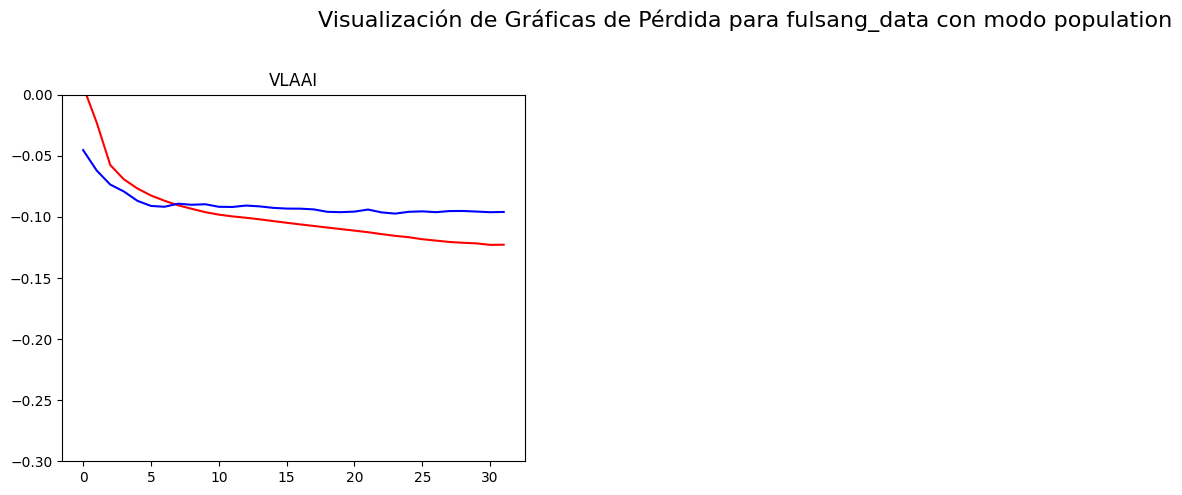

In [21]:
# Seleccionar FCNN o CNN
models = list(metrics[split].keys())
n_subj = len(models)

n_plots = 3

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

idx = 0
for mdl in models[:3]:
    train_loss = torch.tensor(metrics['train'][mdl])
    val_loss = torch.tensor(metrics['val'][mdl])
    x = range(len(val_loss))
    
    axs[idx].plot(x, -train_loss, linestyle = '-', color='r')
    axs[idx].plot(x, -val_loss, linestyle = '-', color= 'b')
    axs[idx].set_ylim(-0.3, 0)
    axs[idx].set_title(mdl)
    idx += 1

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[idx:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle(f'Visualización de Gráficas de Pérdida para {dataset} con modo {key}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

### VAL LOSS

In [38]:
def get_filename(mdl_folder_path, subject):
    list_dir = os.listdir(mdl_folder_path)
    filename = ''
    for file in list_dir:
        if subject in file:
            if subject == 'S1':
                idx = file.index(subject)
                if file[idx+2] == '_': # si el siguiente caracter al S1 es un barra baja añade al diccionario
                    filename = file
            else:
                filename = file
    return filename

In [41]:
key = 'population'

model_path = os.path.join(key, 'models')

datasets = os.listdir(model_path)
models = os.listdir(os.path.join(model_path, datasets[0]))

print(f'Datasets: {datasets}')
print(f'Models: {models}')

Datasets: ['fulsang_data', 'jaulab_data', 'skl_data']
Models: ['batch=128_embd=320_block=64_heads=4_layers=4_ratio=2', 'batch=128_embd=320_block=64_heads=4_layers=4_ratio=2_kernel=1_emb=False', 'batch=128_embd=320_block=64_heads=4_layers=4_ratio=2_kernel=8_emb=True']


In [54]:
# SELECT THE DATASET AND MODEL
dataset = datasets[0]
model = [model for model in models if 'emb=True' in model][0]
model = models[0]
dataset, model

('fulsang_data', 'batch=128_embd=320_block=64_heads=4_layers=4_ratio=2')

In [55]:
# SEE LOSSES DURING TRAINING
path = os.path.join(model_path, dataset, model)
subjects = ['S'+str(n) for n in range(1,13)]

# Return the loss in float 
def get_loss(filename):
    loss = filename.split('=')[-1]
    loss = '.'.join(loss.split('.')[:2])
    return float(loss)

loss_list = []

for subj in subjects:
    filename = get_filename(path, subj)
    loss = get_loss(filename)
    loss_list.append(loss)

In [56]:
from statistics import mean
dict = {subj: loss_list[n] for n, subj in enumerate(subjects)}
media = mean(loss_list)
dict, media

({'S1': 0.1032,
  'S2': 0.1015,
  'S3': 0.1157,
  'S4': 0.1193,
  'S5': 0.0761,
  'S6': 0.0701,
  'S7': 0.2267,
  'S8': 0.1852,
  'S9': 0.062,
  'S10': 0.0654,
  'S11': 0.0409,
  'S12': 0.1076},
 0.10614166666666666)

### MOSTRAR RESULTADOS EVALUACIÓN

In [19]:
# key = 'finetune'
key = 'population'

eval_path = os.path.join(key, 'eval_metrics')

datasets = os.listdir(eval_path)
models = os.listdir(os.path.join(eval_path, datasets[1]))

print(f'Datasets: {datasets}')
print(f'Models: {models}')

Datasets: ['fulsang_data', 'jaulab_data']
Models: ['FCNN_batch=128_block=50_lr=3e-07', 'FCNN_batch=128_block=50_lr=3e-07_filt', 'VLAAI_batch=64_block=320_lr=3e-07', 'VLAAI_batch=64_block=320_lr=3e-07_filt']


In [9]:
# SELECT THE DATASET AND MODEL
dataset = datasets[1]
models = [model for model in models if 'CNN' != model.split('_')[0]]# model = [model for model in models][0]
dataset, models

('jaulab_data',
 ['FCNN_batch=128_block=50_lr=3e-07',
  'FCNN_batch=128_block=50_lr=3e-07_filt',
  'VLAAI_batch=64_block=320_lr=3e-07',
  'VLAAI_batch=64_block=320_lr=3e-07_filt'])

In [10]:
# LOAD RESULTS

# Save the mean results per subject of each dataset
dataset_mean_results = {}
# Save the complete results of each dataset
dataset_results = {}

datasets = [dataset]

for model in models:

    print(model)

    for dataset in datasets:

        path = os.path.join(eval_path, dataset, model)
        file_list = os.listdir(path)

        results = {}

        # Load data from the folder of results
        for file in file_list:
            eval_results = json.load(open(os.path.join(eval_path,dataset,model,file),'r'))
            if 'FCNN' in model:
                index = file.split('_')[0]
            elif 'Ridge' in model:
                index = '2s'
            elif 'VLAAI' in model:
                index = file.split('_')[0]
                index = index.split('=')[-1]
                # index = file.split('_')[0].split('=')
            results[index] = eval_results

        # print(results)
        # Extract the subjects simulated
        subjects = set(list(results.values())[0].keys())
        # print(f'{dataset}, n_subjects: {len(subjects)}, models:')

        # mean score of each subject by computing it with all the samples
        mean_results = {key: [np.mean(values[subj]) for subj in subjects] for key, values in results.items()}

        for key, values in mean_results.items():
            print(f'  - {key}: {np.mean([round(value, 4) for value in values]):.3f} / {np.std([round(value, 4) for value in values]):.2f}')

        # print(results)
        # print(mean_results)

        dataset_results[model] = results # model_results
        dataset_mean_results[model] = mean_results
        # dataset_results[dataset] = results # dataset results
        # dataset_mean_results[dataset] = mean_results

FCNN_batch=128_block=50_lr=3e-07
  - 10s: 0.059 / 0.02
  - 1s: 0.059 / 0.02
  - 25s: 0.058 / 0.02
  - 2s: 0.059 / 0.02
  - 5s: 0.058 / 0.02
FCNN_batch=128_block=50_lr=3e-07_filt
  - 10s: 0.051 / 0.02
  - 1s: 0.052 / 0.02
  - 25s: 0.054 / 0.02
  - 2s: 0.051 / 0.02
  - 5s: 0.051 / 0.02
VLAAI_batch=64_block=320_lr=3e-07
  - 10s: 0.019 / 0.02
  - 1s: 0.020 / 0.02
  - 25s: 0.019 / 0.02
  - 2s: 0.017 / 0.02
  - 5s: 0.020 / 0.02
VLAAI_batch=64_block=320_lr=3e-07_filt
  - 10s: 0.050 / 0.03
  - 1s: 0.029 / 0.01
  - 25s: 0.047 / 0.03
  - 2s: 0.042 / 0.02
  - 5s: 0.043 / 0.02


KeyError: 'jaulab_data'

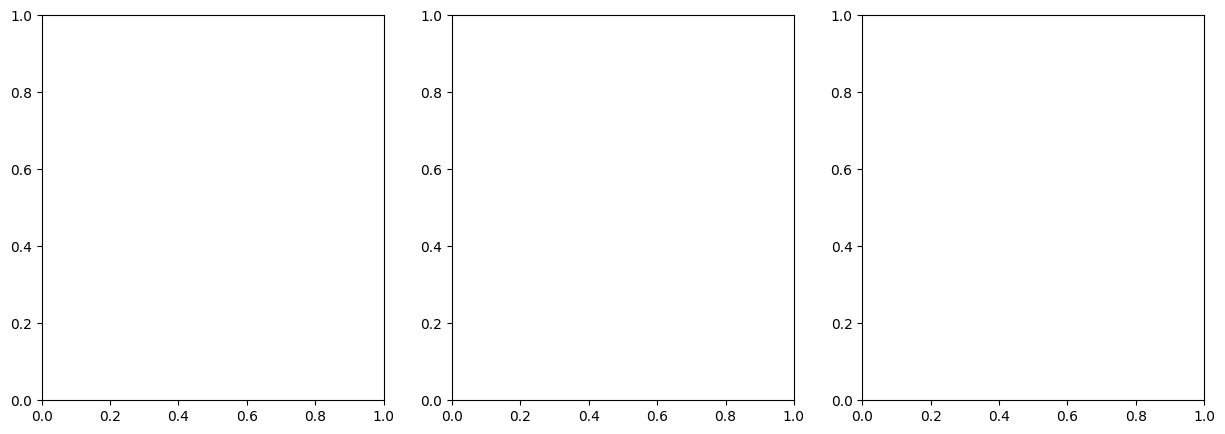

In [11]:
# PLOT DATASETS RESULTS

n_plots = len(datasets)

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

axs = axs.flatten()

for n, dataset in enumerate(datasets):

    mean_results = dataset_mean_results[dataset]

    box = axs[n].boxplot([values for values in list(mean_results.values())], vert=True, patch_artist=True)

    print(list(mean_results.values()))

    # Colores personalizados
    colors = ['skyblue', 'lightgreen', 'lightcoral']

    # Aplicar colores a cada caja
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Personalizar otros elementos del gráfico
    for whisker in box['whiskers']:
        whisker.set(color='blue', linewidth=2)

    for cap in box['caps']:
        cap.set(color='blue', linewidth=2)

    for median in box['medians']:
        median.set(color='red', linewidth=2)

    for flier in box['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)

    # Añadir título y etiquetas
    axs[n].set_title(dataset, fontsize=15, fontweight='bold', pad=20)
    axs[n].set_xlabel('Modelos', fontsize=12)
    axs[n].set_ylabel('Media de correlaciones por sujeto')
    axs[n].set_ylim([-0.1,0.4])
    axs[n].set_xticks([n for n in range(1, len(mean_results)+1)], [key.split('_')[0] for key in mean_results.keys()], fontsize=14)  # Etiquetas personalizadas

    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)

    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=14)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[n+1:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Media de correlación en la recontrucción por sujeto para los distintos datsets', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título


# Mostrar el gráfico
plt.show()

[[0.04800163218169473, 0.0795287352326947, 0.052023853592496984, 0.07642809949660052, 0.06191700905522642, 0.06443420597740139, 0.05258788610323487, 0.05839751240273472, 0.06643009472948809, 0.06887558005594958, 0.031907436767748244, 0.0850834409551074, 0.049578006379306316, 0.057879572894307785, 0.03674410159146646, 0.031197603449982125, 0.083245371216132], [0.05512694700742375, 0.08014562959487338, 0.05481743295246563, 0.0738061896870534, 0.06098068541587436, 0.06424203687963788, 0.047016434261414906, 0.052953482831683024, 0.07053473683738369, 0.06730459738998947, 0.030174107867011316, 0.0868969095959876, 0.044955351346533376, 0.05644061200811328, 0.04200831116881503, 0.024108545380955592, 0.08583227106178014], [0.049613400781527164, 0.0822514109313488, 0.049580457364209, 0.07451909147202969, 0.06446313746273517, 0.06297694370150567, 0.04171859873458743, 0.05845047570765018, 0.06473497245460749, 0.06656631105579436, 0.03002327224239707, 0.08420510515570641, 0.04614193681627512, 0.061

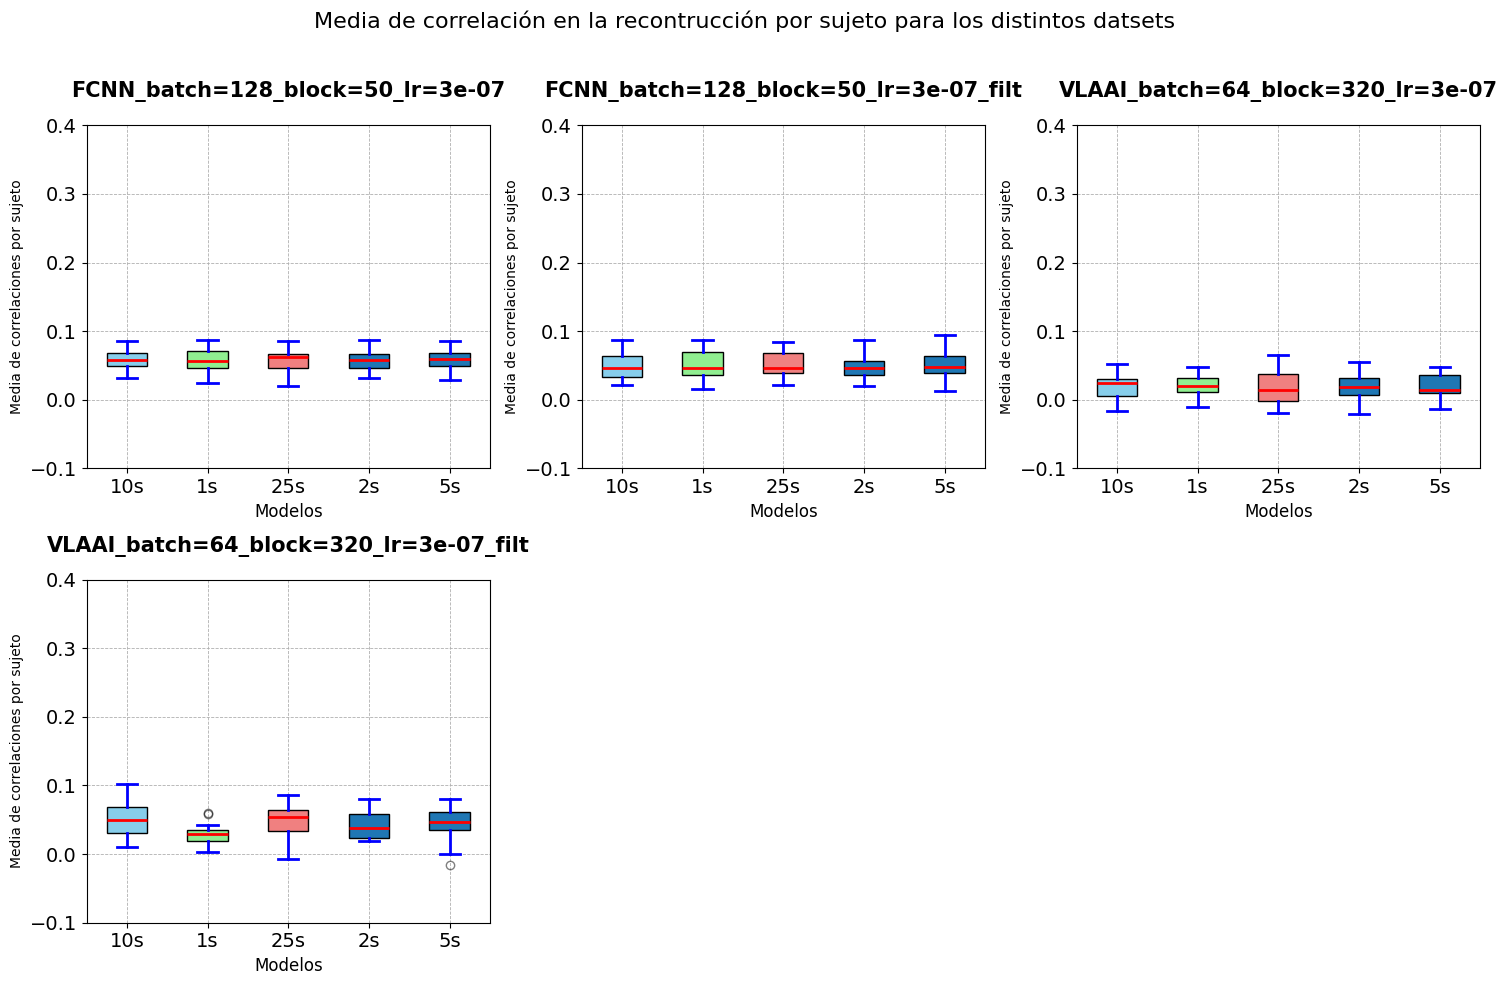

In [12]:
# PLOT DATASETS RESULTS

n_plots = len(models)

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

axs = axs.flatten()

for n, model in enumerate(models):

    mean_results = dataset_mean_results[model]

    box = axs[n].boxplot([values for values in list(mean_results.values())], vert=True, patch_artist=True)

    print(list(mean_results.values()))

    # Colores personalizados
    colors = ['skyblue', 'lightgreen', 'lightcoral']

    # Aplicar colores a cada caja
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Personalizar otros elementos del gráfico
    for whisker in box['whiskers']:
        whisker.set(color='blue', linewidth=2)

    for cap in box['caps']:
        cap.set(color='blue', linewidth=2)

    for median in box['medians']:
        median.set(color='red', linewidth=2)

    for flier in box['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)

    # Añadir título y etiquetas
    axs[n].set_title(model, fontsize=15, fontweight='bold', pad=20)
    axs[n].set_xlabel('Modelos', fontsize=12)
    axs[n].set_ylabel('Media de correlaciones por sujeto')
    axs[n].set_ylim([-0.1,0.4])
    axs[n].set_xticks([n for n in range(1, len(mean_results)+1)], [key.split('_')[0] for key in mean_results.keys()], fontsize=14)  # Etiquetas personalizadas

    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)

    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=14)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[n+1:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Media de correlación en la recontrucción por sujeto para los distintos datsets', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título


# Mostrar el gráfico
plt.show()

In [78]:
datasets

['fulsang_data']

In [22]:
models

['FCNN_batch=128_block=50_lr=3e-07', 'VLAAI_batch=64_block=320_lr=3e-07']

In [23]:
models = [model for model in models if 'filt' not in model]
window = '5s'

mean_results = {model:dataset_mean_results[model][window] for model in models}

In [24]:
colormap = matplotlib.colormaps.get_cmap('Purples')
colormap(0.2)

(0.8878431372549019, 0.8847058823529411, 0.9372549019607843, 1.0)

VLAAI_batch=64_block=320_lr=3e-07: 0.01719411764705882
FCNN_batch=128_block=50_lr=3e-07: 0.058635294117647056


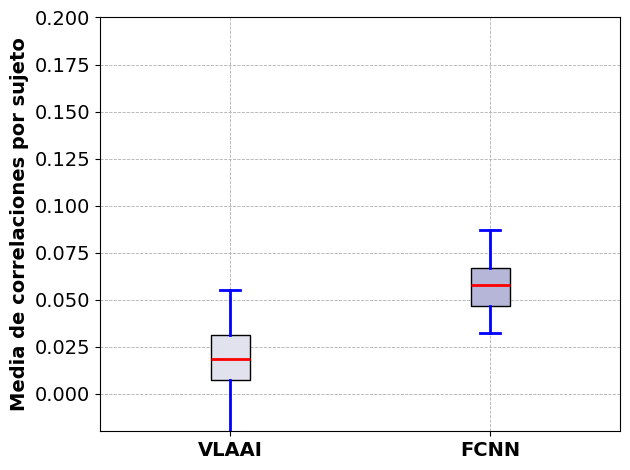

In [25]:
# MUESTRA SOLO UN DATASET

# models = [model for model in models if 'CNN' not in model]
window = '2s'
models[0], models[1] = models[1], models[0]
mean_results = {model:dataset_mean_results[model][window] for model in models}

for key, values in mean_results.items():
    print(key +': ' + str(np.mean([round(value, 4) for value in values])))

box = plt.boxplot([values for values in list(mean_results.values())], vert=True, patch_artist=True)

# Obtener un colormap de púrpuras con la cantidad de colores necesaria
num_boxes = len(mean_results)
colormap = matplotlib.colormaps.get_cmap('Purples')  # Escala de púrpuras con tantos colores como cajas

# Aplicar colores a cada caja
for patch, color_index in zip(box['boxes'], range(num_boxes)):
    patch.set_facecolor(colormap(color_index / num_boxes*0.4 + 0.2))

# Personalizar otros elementos del gráfico
for whisker in box['whiskers']:
    whisker.set(color='blue', linewidth=2)

for cap in box['caps']:
    cap.set(color='blue', linewidth=2)

for median in box['medians']:
    median.set(color='red', linewidth=2)

for flier in box['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

# Añadir título y etiquetas
# plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Media de correlaciones por sujeto', fontsize=14, fontweight='bold')
plt.ylim([-0.02,0.2])
plt.xticks([n+1 for n in range(len(mean_results))], [key.split('_')[0] for key in mean_results.keys()], fontsize=14, fontweight='bold')  # Etiquetas personalizadas

# Añadir rejilla para mayor legibilidad
plt.grid(True, linestyle='--', linewidth=0.6)

# Personalizar ejes
plt.tick_params(axis='both', which='major', labelsize=14)

# Agregar un título general a la figura
# plt.title('Media de correlación en la reconstrucción por sujeto para ' + dataset, fontsize=16, pad=20)
plt.tight_layout()  # Ajustar el layout para dejar espacio para el título


# Mostrar el gráfico
plt.show()

In [26]:
print(dataset_results[dataset].keys())
print(dataset_results[dataset].values())

KeyError: 'jaulab_data'

In [44]:
dataset = 'fulsang_data'
results = dataset_results[dataset]
subjects = [subj for subj in results[list(results.keys())[0]].keys()]
print(subjects)
results_subj = {subject: {model: data[subject] for model, data in results.items()} for subject in subjects}

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18']


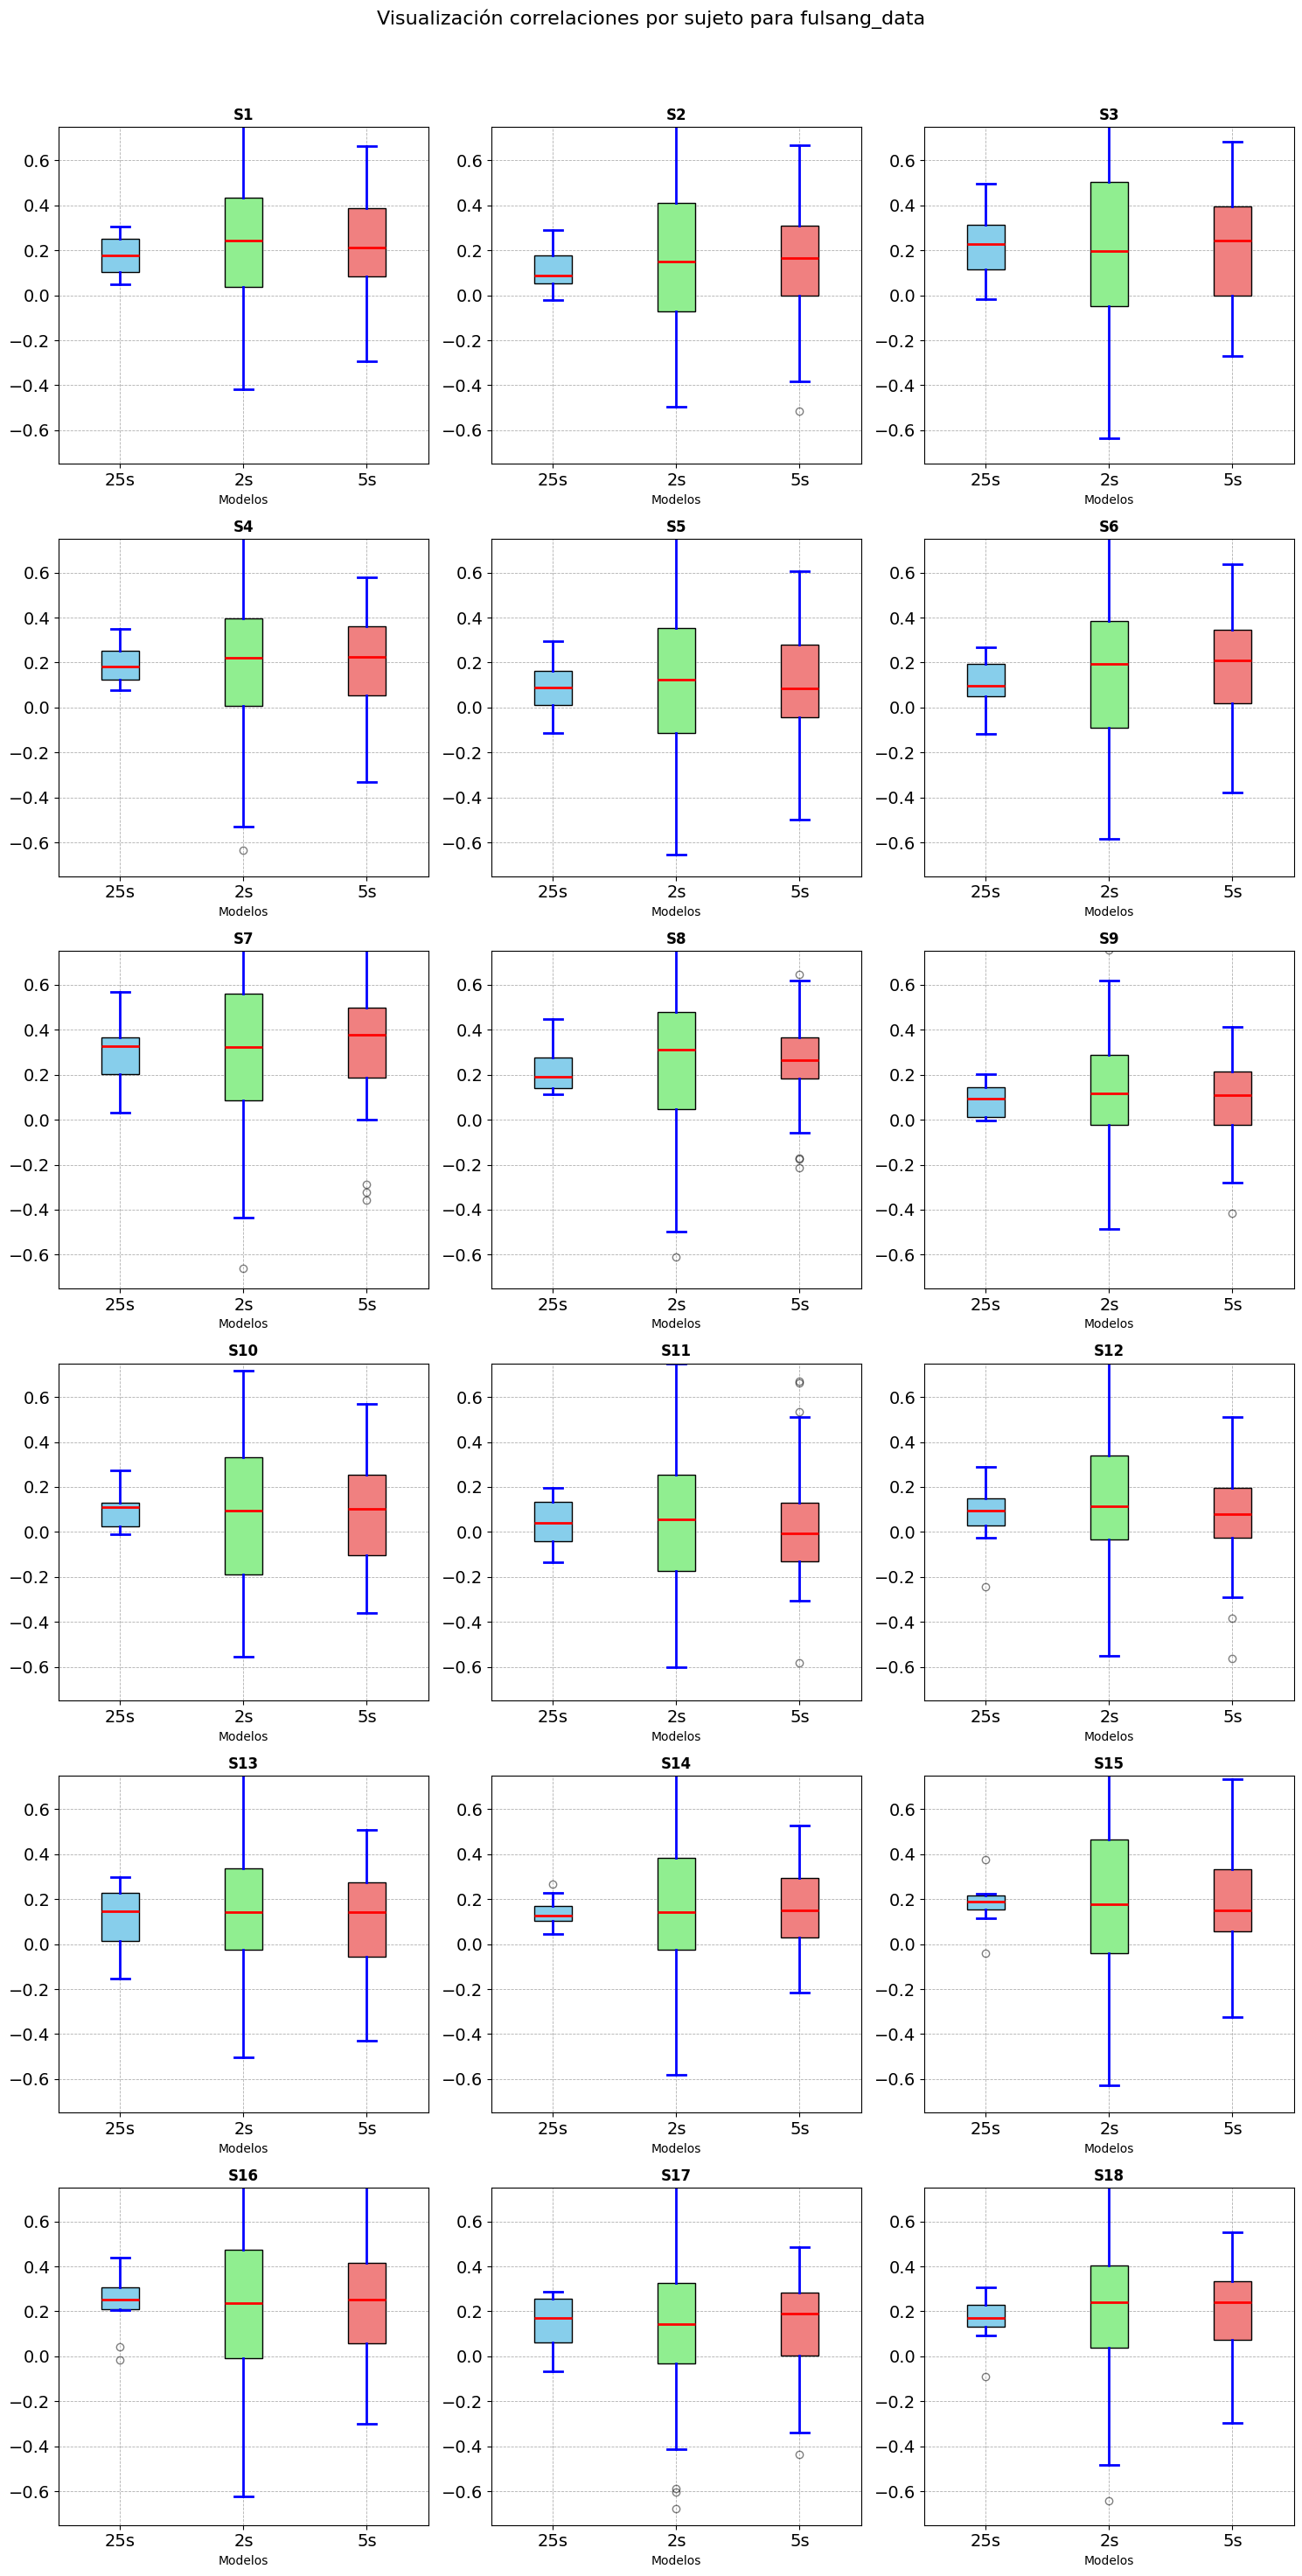

In [45]:
n_plots = len(results_subj)

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

for n, (subj, values) in enumerate(results_subj.items()):

    box = axs[n].boxplot([data for data in values.values()], vert=True, patch_artist=True)
    
    # Colores personalizados
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    
    # Aplicar colores a cada caja
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # Personalizar otros elementos del gráfico
    for whisker in box['whiskers']:
        whisker.set(color='blue', linewidth=2)
    
    for cap in box['caps']:
        cap.set(color='blue', linewidth=2)
    
    for median in box['medians']:
        median.set(color='red', linewidth=2)
    
    for flier in box['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)
    
    # Añadir título y etiquetas
    axs[n].set_title(subj, fontweight='bold')
    axs[n].set_xlabel('Modelos')
    axs[n].set_xticks([n+1 for n, model in enumerate(values.keys())], [model.split('_')[0] for model in values.keys()])  # Etiquetas personalizadas
    axs[n].set_ylim([-0.75, 0.75])
    
    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)
    
    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=14)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[n+1:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Visualización correlaciones por sujeto para '+ dataset, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

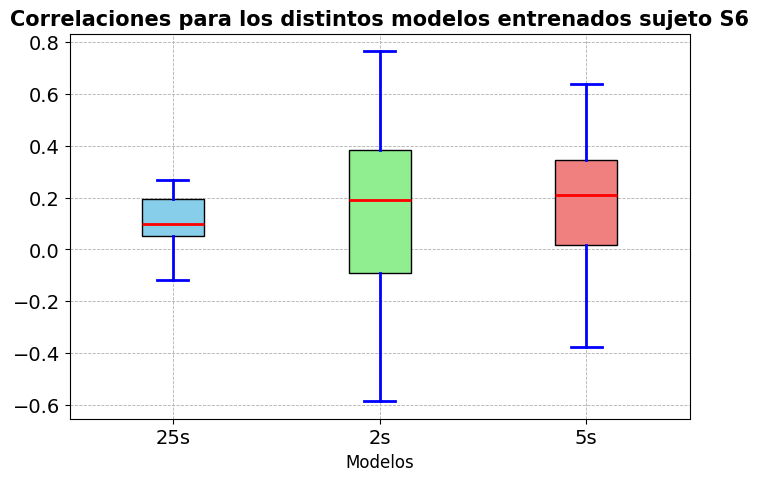

In [46]:
# EJEMPLO POR SUJETO
subj = subjects[5]
mdl_results = results_subj[subj]

plt.figure(figsize=(8, 5))  # Tamaño de la figura

# Crear el gráfico de cajas
box = plt.boxplot([value for value in mdl_results.values()], vert=True, patch_artist=True)

# Colores personalizados
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Aplicar colores a cada caja
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Personalizar otros elementos del gráfico
for whisker in box['whiskers']:
    whisker.set(color='blue', linewidth=2)

for cap in box['caps']:
    cap.set(color='blue', linewidth=2)

for median in box['medians']:
    median.set(color='red', linewidth=2)

for flier in box['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

# Añadir título y etiquetas
plt.title('Correlaciones para los distintos modelos entrenados sujeto '+subj, fontsize=15, fontweight='bold')
plt.xlabel('Modelos', fontsize=12)
plt.xticks([n+1 for n, m in enumerate(mdl_results.keys())], [model.split('_')[0] for model in mdl_results.keys()], fontsize=14)  # Etiquetas personalizadas

# Añadir rejilla para mayor legibilidad
plt.grid(True, linestyle='--', linewidth=0.6)

# Personalizar ejes
plt.tick_params(axis='both', which='major', labelsize=14)

# Mostrar el gráfico
plt.show()

### PREDS VS NULL DISTR

In [57]:
key = 'population'

eval_path = os.path.join(key, 'eval_metrics')

datasets = os.listdir(eval_path)
models = os.listdir(os.path.join(eval_path, datasets[0]))

print(f'Datasets: {datasets}')
print(f'Models: {models}')

Datasets: ['fulsang_data']
Models: ['FCNN_batch=128_block=50_lr=3e-07', 'FCNN_batch=128_block=50_lr=3e-07_filt', 'Ridge', 'Ridge_filt', 'VLAAI_batch=64_block=320_lr=3e-07', 'VLAAI_batch=64_block=320_lr=3e-07_filt']


In [58]:
# SELECCIONO EL DATASET Y MODELO
dataset = datasets[0]
model = [model for model in models if 'VLAAI' in model and 'filt' in model][0]
path = os.path.join(eval_path, dataset, model)
file_list = os.listdir(path)
file_list

['10s_nd_Results',
 '10s_Results',
 '25s_nd_Results',
 '25s_Results',
 '2s_nd_Results',
 '2s_Results',
 '5s_nd_Results',
 '5s_Results']

In [59]:
# SELECCIONO los nd y los no nd
model_list = [file for file in file_list if 'nd' not in file]
model_list_nd = [file_nd for file_nd in file_list if 'nd' in file_nd]
model_list, model_list_nd

(['10s_Results', '25s_Results', '2s_Results', '5s_Results'],
 ['10s_nd_Results', '25s_nd_Results', '2s_nd_Results', '5s_nd_Results'])

In [60]:
results = {}

# Load data from the folder of results
for file, file_nd in zip(model_list, model_list_nd):
    print(file)
    idx = '_'.join(file.split('_')[:2])

    results[idx] = {}

    eval_results = json.load(open(os.path.join(eval_path,dataset,model,file_nd),'r'))
    eval_cat = torch.cat([torch.tensor(results) for results in list(eval_results.values())])
    print(len(eval_cat))
    results[idx]['nd'] = eval_cat

    eval_results = json.load(open(os.path.join(eval_path,dataset,model,file),'r'))
    eval_cat = torch.cat([torch.tensor(results) for results in list(eval_results.values())])
    print(len(eval_cat))
    results[idx]['eval'] = eval_cat

10s_Results
432
432
25s_Results
162
162
2s_Results
2232
2232
5s_Results
882
882


In [61]:
results.keys()

dict_keys(['10s_Results', '25s_Results', '2s_Results', '5s_Results'])

torch.Size([432])
torch.Size([162])
torch.Size([2232])
torch.Size([882])


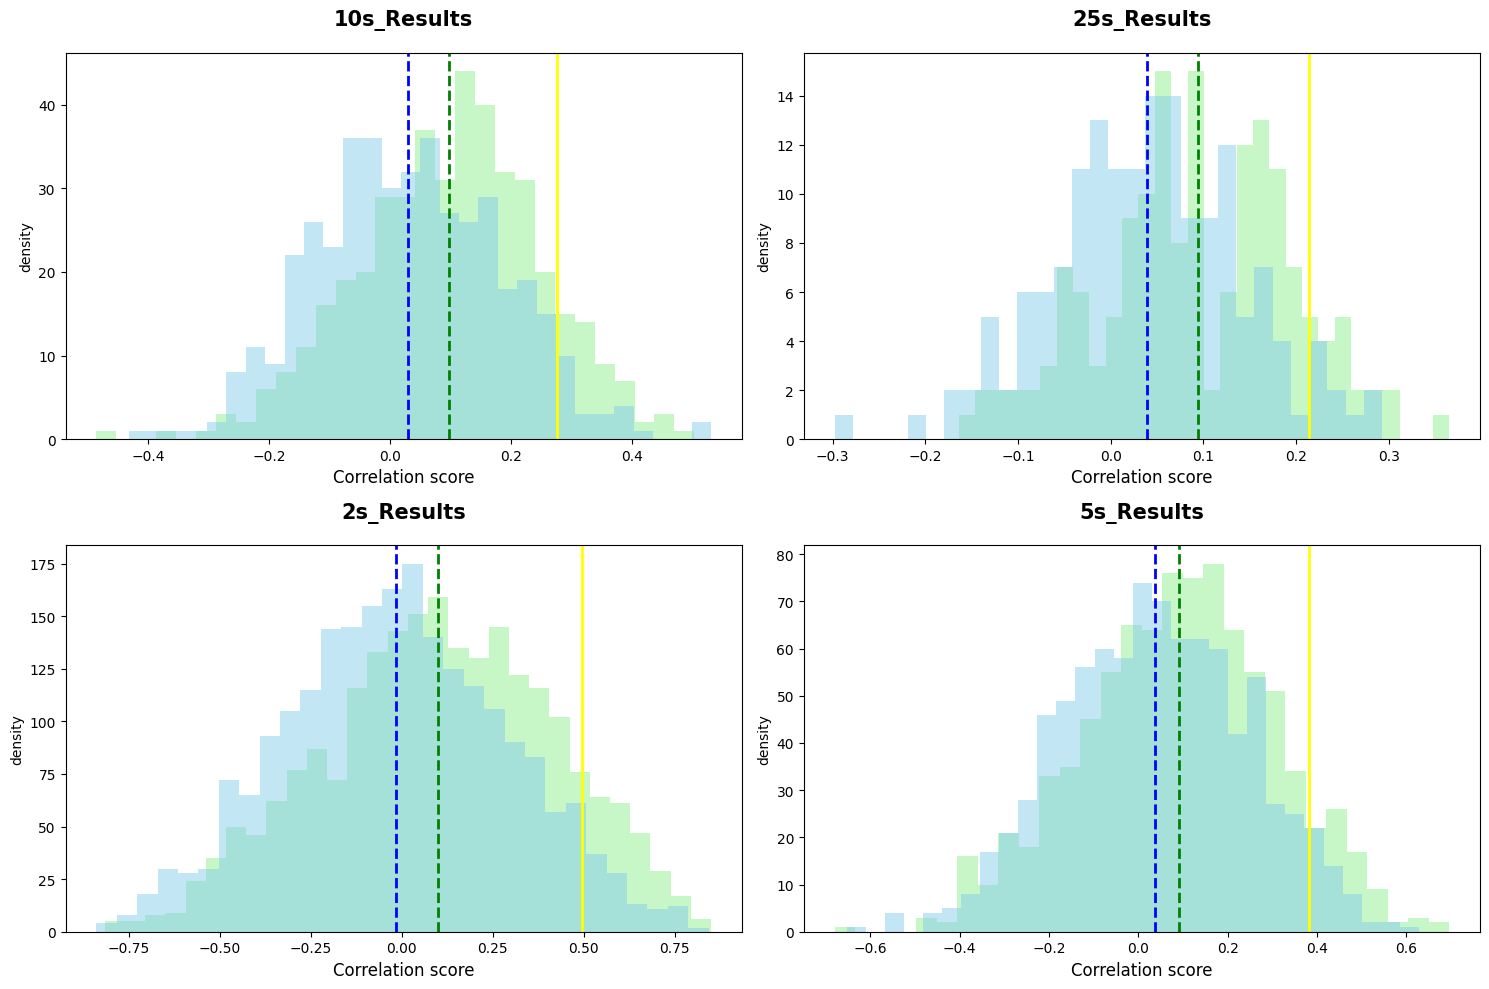

In [62]:
n_plots = len(results)

# Calcular el número de filas necesarias
n_rows = (n_plots + 1) // 2

fig, axs = plt.subplots(nrows=n_rows, ncols = 2, figsize = (15, 5*n_rows))

# aplanamiento para acceso facil, no por columnas o por filas
axs = axs.flatten()

for n, (key, value) in enumerate(results.items()):

    eval_results, nd_results = results[key]['eval'], results[key]['nd']
    percentile = np.percentile(nd_results, 95)
    print(eval_results.shape)
    
    mean_eval = torch.mean(eval_results)
    mean_nd = torch.mean(nd_results)
    
    axs[n].hist(eval_results, bins = 30, alpha= 0.5, color='lightgreen', label='eval_results')
    axs[n].hist(nd_results, bins = 30, alpha= 0.5, color='skyblue', label='nd_results')
    axs[n].axvline(mean_eval, color='green', linestyle='dashed', linewidth = 2, label='mean')
    axs[n].axvline(mean_nd, color='blue', linestyle='dashed', linewidth = 2, label='mean')
    axs[n].axvline(percentile, color='yellow', linestyle='-', linewidth = 2, label='percentile')

    # Añadir título y etiquetas
    axs[n].set_title(key, fontsize=15, fontweight='bold', pad=20)
    axs[n].set_xlabel('Correlation score', fontsize=12)
    axs[n].set_ylabel('density')

plt.tight_layout()

### DECODING ACCURACIES

In [55]:
# SELECT DATASET AND MODEL
key = 'population'

eval_path = os.path.join(key, 'decode_accuracy')

datasets = os.listdir(eval_path)
models = os.listdir(os.path.join(eval_path, datasets[1]))

print(f'Datasets: {datasets}')
print(f'Models: {models}')

Datasets: ['fulsang_data', 'jaulab_data']
Models: ['FCNN_batch=128_block=50_lr=3e-07', 'FCNN_batch=128_block=50_lr=3e-07_filt', 'VLAAI_batch=64_block=320_lr=3e-07', 'VLAAI_batch=64_block=320_lr=3e-07_filt']


In [56]:
# SELECT THE DATASET AND MODEL
dataset = datasets[1]
# models = [model for model in models if 'emb=False' in model]
models = [model for model in models]
dataset, models

('jaulab_data',
 ['FCNN_batch=128_block=50_lr=3e-07',
  'FCNN_batch=128_block=50_lr=3e-07_filt',
  'VLAAI_batch=64_block=320_lr=3e-07',
  'VLAAI_batch=64_block=320_lr=3e-07_filt'])

In [57]:
model_info = {}
jaulab_excl_subj = [1,2,7,13]
for model in models:
    path = os.path.join(key, 'decode_accuracy', dataset, model)
    file_list = os.listdir(path)
    model_info[model] = {}
    for file in file_list:
        time = file.split('_')[0]
        data = json.load(open(os.path.join(path, file),'r'))
        # data = [acc for n, acc in enumerate(data) if n not in jaulab_excl_subj]
        model_info[model][time] = data

In [58]:
model_info.values()

dict_values([{'10s': [87.5, 79.16666666666666, 79.16666666666666, 91.66666666666666, 75.0, 54.166666666666664, 79.16666666666666, 91.66666666666666, 66.66666666666666, 37.5, 66.66666666666666, 79.16666666666666, 62.5, 25.0, 70.83333333333334, 95.83333333333334, 62.5], '1s': [65.96638655462185, 61.34453781512605, 59.2436974789916, 58.40336134453782, 57.98319327731093, 51.26050420168067, 57.98319327731093, 63.02521008403361, 57.14285714285714, 47.05882352941176, 50.84033613445378, 65.54621848739495, 52.52100840336135, 39.91596638655462, 56.72268907563025, 67.64705882352942, 58.82352941176471], '25s': [100.0, 100.0, 80.0, 100.0, 80.0, 30.0, 80.0, 100.0, 70.0, 40.0, 60.0, 90.0, 70.0, 10.0, 70.0, 100.0, 90.0], '2s': [72.26890756302521, 63.86554621848739, 55.46218487394958, 64.70588235294117, 63.86554621848739, 54.621848739495796, 66.38655462184873, 63.02521008403361, 63.86554621848739, 48.739495798319325, 50.42016806722689, 72.26890756302521, 60.50420168067227, 40.33613445378151, 56.3025210

In [41]:
models = [model for model in models if 'filt' in model]

In [59]:
# diccionario agrupando por índices de tiempo y modelos
time_keys = model_info[models[0]].keys()
print(time_keys)
times_info = {time: {model: model_info[model][time] for model in models} for time in time_keys}

dict_keys(['10s', '1s', '25s', '2s', '5s'])


In [60]:
# order time keys and model_info
time_keys = sorted(time_keys, key= lambda x: int(x[:-1]))
times_info = {time: {model: model_info[model][time] for model in models} for time in time_keys}
model_info = {model: {time: model_info[model][time] for time in time_keys} for model in models}

1s
  - FCNN_batch=128_block=50_lr=3e-07: 57.143 / 6.93
  - FCNN_batch=128_block=50_lr=3e-07_filt: 57.612 / 4.49
  - VLAAI_batch=64_block=320_lr=3e-07: 52.867 / 3.00
  - VLAAI_batch=64_block=320_lr=3e-07_filt: 51.278 / 3.77
2s
  - FCNN_batch=128_block=50_lr=3e-07: 60.504 / 8.68
  - FCNN_batch=128_block=50_lr=3e-07_filt: 61.443 / 8.23
  - VLAAI_batch=64_block=320_lr=3e-07: 53.490 / 4.16
  - VLAAI_batch=64_block=320_lr=3e-07_filt: 53.440 / 4.33
5s
  - FCNN_batch=128_block=50_lr=3e-07: 67.647 / 13.78
  - FCNN_batch=128_block=50_lr=3e-07_filt: 67.892 / 10.60
  - VLAAI_batch=64_block=320_lr=3e-07: 58.056 / 7.48
  - VLAAI_batch=64_block=320_lr=3e-07_filt: 55.627 / 8.27
10s
  - FCNN_batch=128_block=50_lr=3e-07: 70.833 / 18.36
  - FCNN_batch=128_block=50_lr=3e-07_filt: 74.020 / 14.61
  - VLAAI_batch=64_block=320_lr=3e-07: 60.160 / 11.41
  - VLAAI_batch=64_block=320_lr=3e-07_filt: 56.952 / 13.15
25s
  - FCNN_batch=128_block=50_lr=3e-07: 74.706 / 25.92
  - FCNN_batch=128_block=50_lr=3e-07_filt: 8

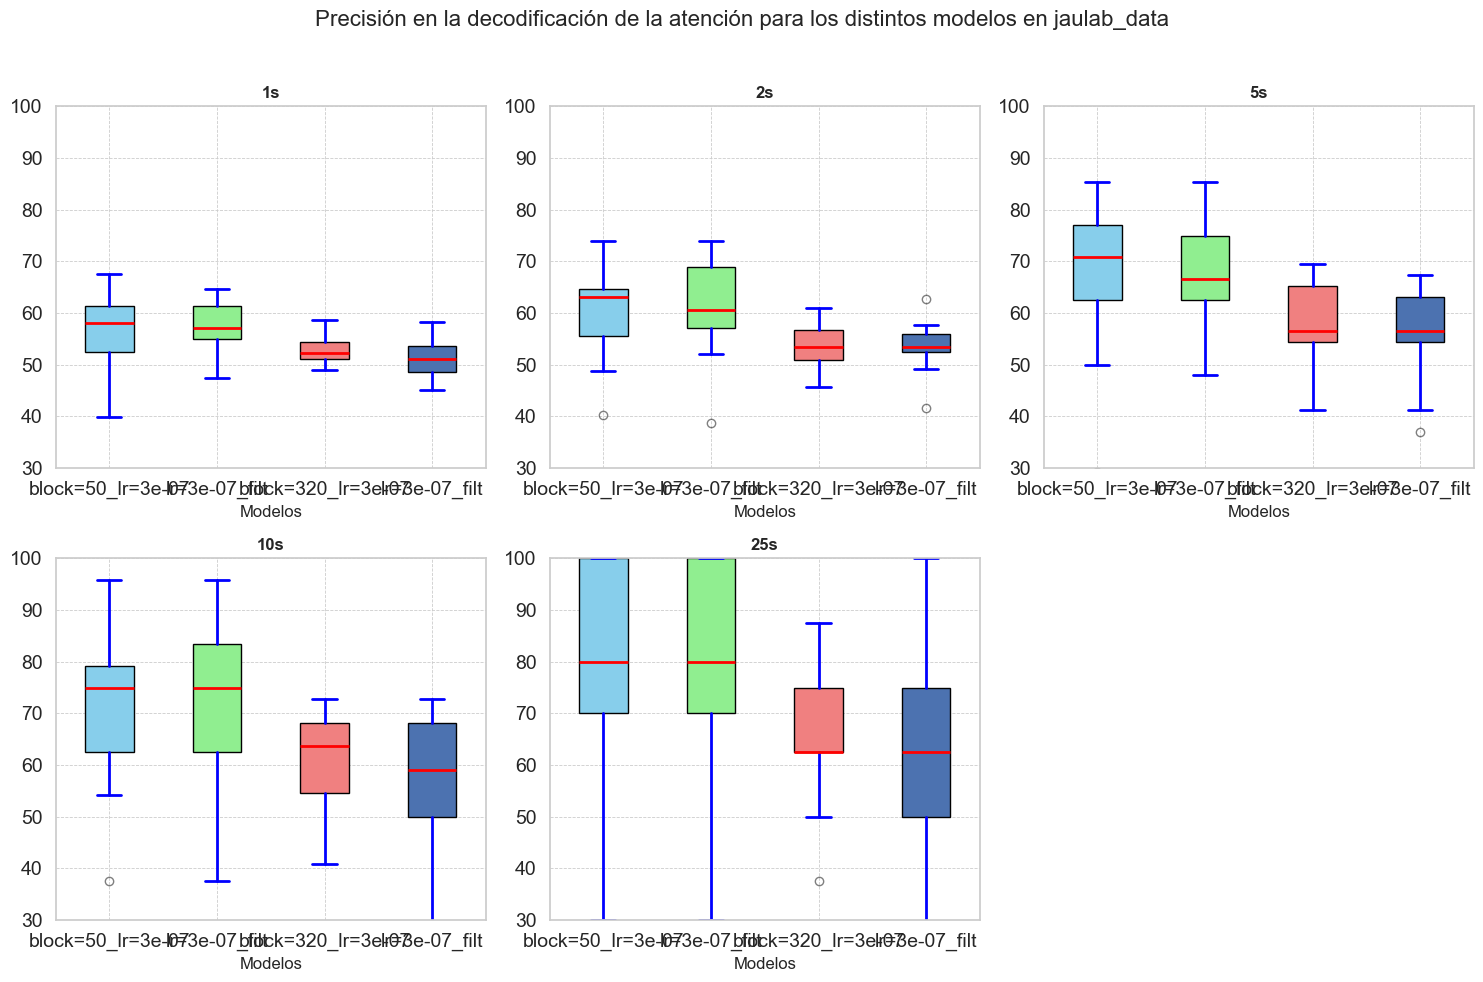

In [61]:
n_plots = len(times_info.keys())

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

for n, (idx, mdl_info) in enumerate(times_info.items()):

    ventanas_media = list(model_info[models[0]].keys())

    if idx.split('_')[0] in ventanas_media:
        print(idx)
        for model in models:
            # print(f'{model}: {np.mean(mdl_info[model])}')
            print(f'  - {model}: {np.mean(mdl_info[model]):.3f} / {np.std(mdl_info[model]):.2f}')

    box = axs[n].boxplot([mdl_info[model] for model in models], vert=True, patch_artist=True)
    
    # Colores personalizados
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    
    # Aplicar colores a cada caja
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # Personalizar otros elementos del gráfico
    for whisker in box['whiskers']:
        whisker.set(color='blue', linewidth=2)
    
    for cap in box['caps']:
        cap.set(color='blue', linewidth=2)
    
    for median in box['medians']:
        median.set(color='red', linewidth=2)
    
    for flier in box['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)
    
    # Añadir título y etiquetas
    axs[n].set_title(idx, fontweight='bold')
    axs[n].set_xlabel('Modelos')
    axs[n].set_xticks([n+1 for n in range(len(models))], ['_'.join(model.split('_')[-2:]) for model in models])  # Etiquetas personalizadas
    axs[n].set_ylim([30,100])
    
    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)
    
    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=14)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[n+1:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Precisión en la decodificación de la atención para los distintos modelos en '+dataset, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

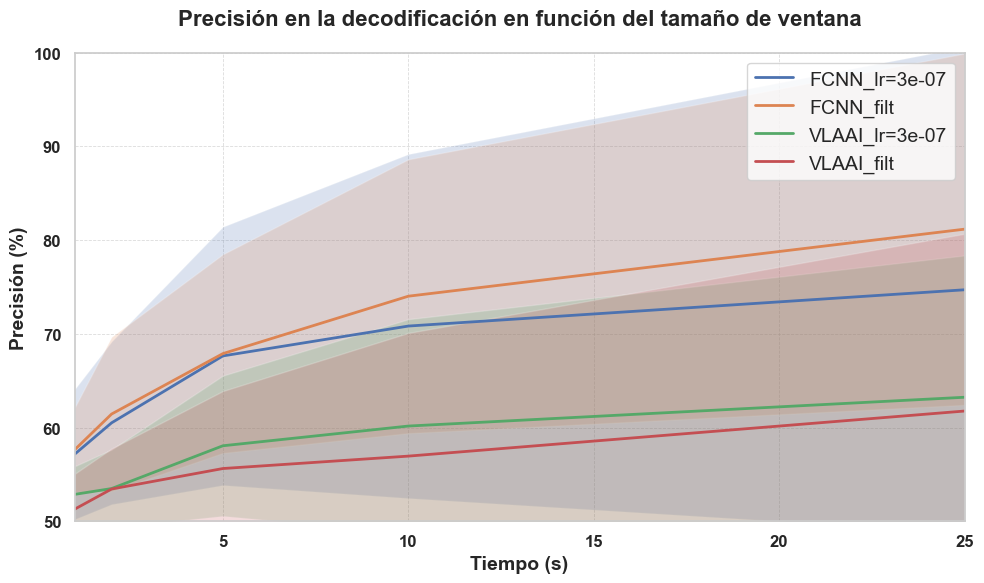

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que ya tienes 'model_info' y 'models'
# models = [model for model in model_info.keys() if 'filt' in model]

# Crear una figura y un eje
plt.figure(figsize=(10, 6))

for model in models:
    mean_values = []
    std_values = []
    times = list(model_info[model].keys())

    for time in times:
        results = model_info[model][time]
        mean_values.append(np.mean(results))
        std_values.append(np.std(results))

    # Convertir tiempos a valores numéricos si es necesario, sino usar directamente las etiquetas de tiempo
    times = [int(t[:-1]) for t in times]  # Esto elimina la 's' y convierte en enteros

    # Graficar la línea con la media
    plt.plot(times, mean_values, label=model.split('_')[0]+'_'+model.split('_')[-1], linewidth=2)

    # Añadir la sombra de desviación estándar
    plt.fill_between(times, 
                     np.array(mean_values) - np.array(std_values), 
                     np.array(mean_values) + np.array(std_values), 
                     alpha=0.2)  # Sombra con opacidad 20%

# Añadir leyenda
plt.legend(loc='upper right', fontsize=14)

# Añadir etiquetas y título
plt.xlabel('Tiempo (s)', fontsize=14, fontweight='bold')
plt.ylabel('Precisión (%)', fontsize=14, fontweight='bold')
plt.title('Precisión en la decodificación en función del tamaño de ventana', fontsize=16, fontweight='bold', pad=20)

# Aplicar estilo de cuadrícula más profesional
plt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Establecer los límites de los ejes (opcional, ajusta según tu rango de datos)
plt.xlim([min(times), max(times)])
plt.ylim([50,100])

# Mejorar la visualización de los ticks
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Ajustar el diseño para mejorar la presentación
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [234]:
array = [54.92393915132106, 55.964771817453965, 56.44515612489992, 59.167333867093674, 54.84387510008006, 53.88310648518815, 64.77181745396317, 58.04643714971978, 51.00080064051241, 55.564451561248994, 49.159327461969575, 54.203362690152126, 57.405924739791836, 57.726180944755804, 63.81104883907126, 54.04323458767014, 51.96156925540433, 57.08566853482786]
len(array)

18

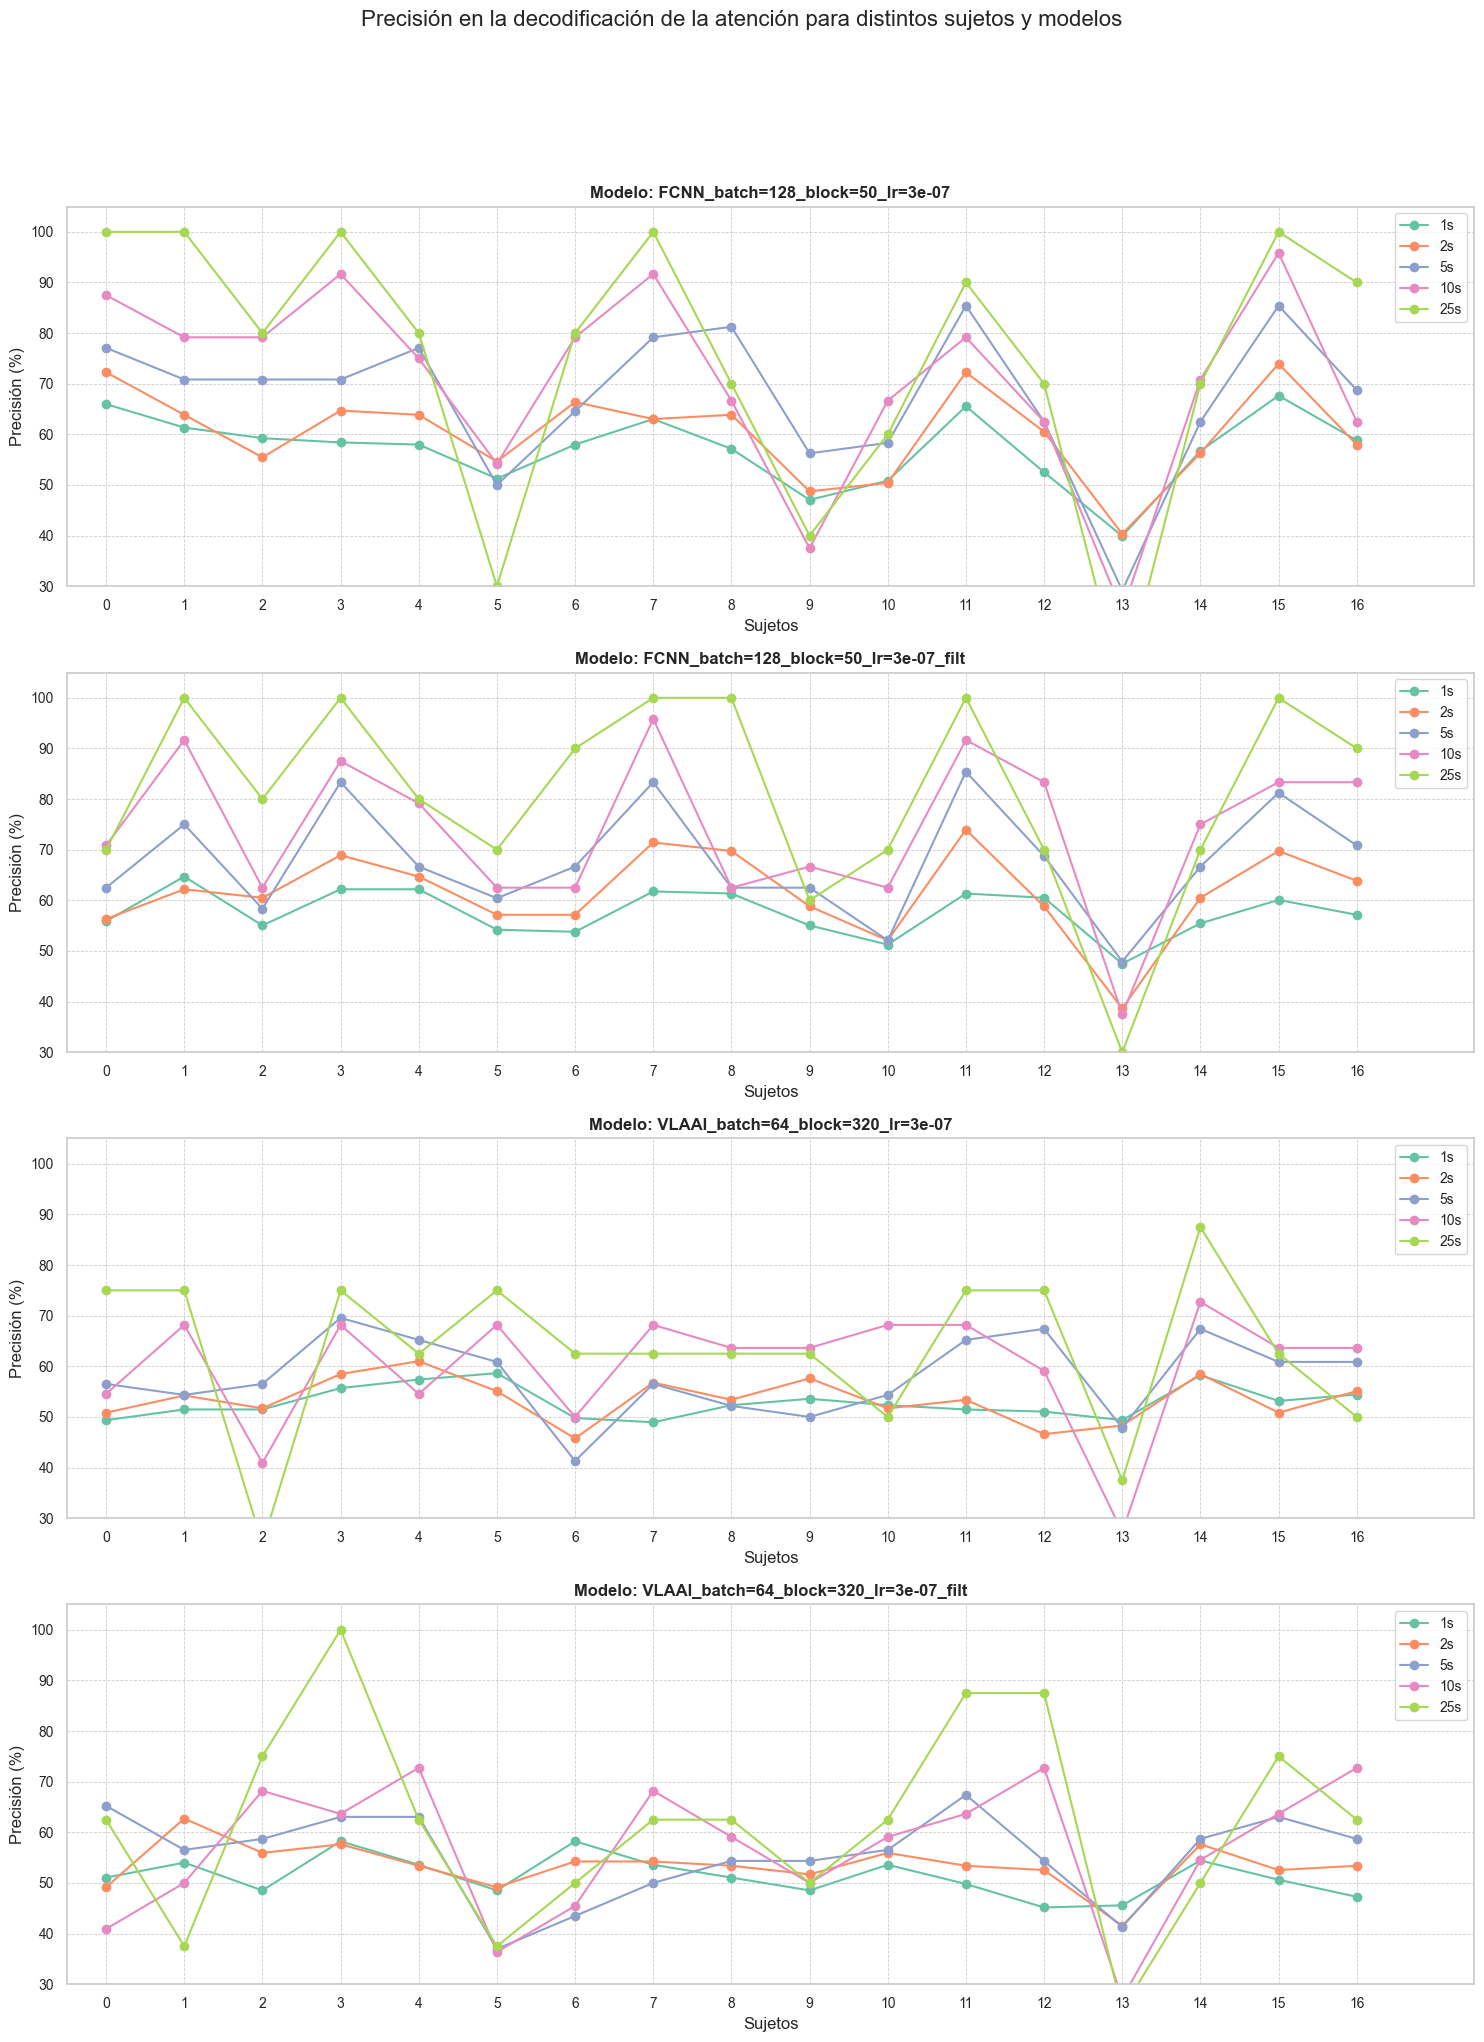

In [53]:
# Establecer estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=len(model_info), ncols=1, figsize=(15, 5 * len(model_info)))

# Aplanar la matriz de subfiguras para un acceso fácil
if len(model_info) == 1:
    axs = [axs]  # Convertir en lista si es un solo subplot
else:
    axs = axs.flatten()

# Paleta de colores de seaborn
colors = sns.color_palette("Set2", len(time_keys))  # Tres colores diferentes

# Crear las subfiguras
for n, (idx, tms_info) in enumerate(model_info.items()):
    
    x = range(len(tms_info[list(time_keys)[0]]))

    for i, time in enumerate(list(time_keys)):
        axs[n].plot(x, tms_info[time], linestyle='-', marker='o', color=colors[i], label=time)
    
    # Añadir título y etiquetas
    axs[n].set_title(f'Modelo: {idx}', fontweight='bold')
    axs[n].set_xlabel('Sujetos', fontsize=12)
    axs[n].set_ylabel('Precisión (%)', fontsize=12)
    axs[n].set_ylim([30, 105])
    axs[n].set_xlim([-0.5, 17.5])
    
    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)
    
    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=10)
    
    # Configurar el eje x para mostrar números enteros
    axs[n].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Configurar el eje x para mostrar números enteros y todos los índices
    axs[n].set_xticks(x)
    axs[n].set_xticklabels(x)
    
    # Añadir leyenda
    axs[n].legend(loc='best', fontsize=10)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
if len(model_info) < len(axs):
    for ax in axs[len(model_info):]:
        fig.delaxes(ax)

# Ajustar el layout
plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Precisión en la decodificación de la atención para distintos sujetos y modelos', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

# Mostrar la gráfica
plt.show()